---
layout: post
title: "CNN에 관하여"
author: "Chanjun Kim"
categories: Data분석
tags: [DeepLearning, DL, CNN, 이미지, 영상]
image: 03_entropy_gini.png
---

## **학습목적**
이미지 데이터를 처리하고 학습하는 딥러닝 모델 중 CNN을 공부하고 오픈 이미지 데이터를 가지고 한 스텝 한 스텝 따라가본다.<br>

## **CNN이란?**
Convolutional Neural Network의 약자로 주로 이미지나 영상 데이터를 처리하기 위한 딥러닝 알고리즘 중 하나이다. <br>
Flatten한 데이터를 처리하는 Fully Connected Neural Network와 다르게 이미지의 공간 정보 데이터를 유지하여 이미지를 인식할 수 있도록 만든다.<br>
이를 위해서 Filter, Pooling, Padding, Stride 등의 개념들이 사용되며, 천천히 알아가보도록 하겠습니다.

> 출처/참고자료 : http://taewan.kim/post/cnn/

간단한 이미지를 참고해서 가져오겠습니다. 출처는 [http://taewan.kim/post/cnn/](http://taewan.kim/post/cnn/) 입니다.<br>
사람은 간단하게 2라고 보이는 것을 알 수 있지만, 컴퓨터 혹은 딥러닝으로 학습시키기에는 이렇게만 정보가 있어서는 안됩니다.<br>
<img src = "https://blog.kakaocdn.net/dn/cJXmju/btqvGBJVMH0/WdMzvcKhEiMvaIAZuoYQfk/img.png" alt = "Oops" width = "300"/>
<br>

그래서 위와 같이 숫자로 이루어진 바둑판 모양으로 변환을 하게됩니다.<br>
<img src = "https://blog.kakaocdn.net/dn/bBoEcG/btqvGDucYov/thqHXwKvveVJmsbXJkHns0/img.png" alt = "Oops" width = "300"/>
<br>

그리고 각 위치별 특성을 보기 위하여 filter라는 어떠한 판을 만들어 그것을 곱하여 특성으로 사용되게 됩니다.<br>
<img src = "https://blog.kakaocdn.net/dn/Qa6UF/btqvFXmb9XY/nAMjiM4QwUgZ1K7egHWvsk/img.png" alt = "Oops" width = "600"/>

참고 그림이 잠깐 달라지지만, 결국 아래와 같은 Feature map을 만들 수 있습니다.<br>
여기서는 [[1, 0, 1], [0, 1, 0], [1, 0, 1]] 이렇게 생긴 filter를 사용했네요.<br>
<img src = "http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif" alt = "Oops" width = "600"/>
<br>

Filter에 대한 값은 [Keras layer initializers](https://keras.io/api/layers/initializers/)에서 확인하실 수 있습니다.<br>
다양하게 초기화시킬 수 있지만, 이 파라미터를 크게 바꾸는 경우나 바꿔서 크게 성능이 좋아지는 경우는 아직 확인하지 못했습니다.<br>
<br>

이러한 Convolution과 filter의 개념을 사용하여 아래와 같은 그림으로 CNN이 이루어지게 됩니다.<br>
<img src = "https://blog.kakaocdn.net/dn/NWDaW/btqvHgZ2d0Z/sEV8R4ANc3HltM2eKvmhvk/img.jpg" alt = "Oops" width = "800"/>

> 출처/참고자료 : http://taewan.kim/post/cnn/<br>
> 출처/참고자료 : https://youngq.tistory.com/40

그럼 이제 위에서 나오는 channel, Pooling, padding, Stride 등의 용어에 대해서 정리해보겠습니다.

- Channel
    - 채널은 이미지의 차원?이라고 생각하시면 될 것 같습니다. 흑백(Grey scale) 이미지에서는 1개의 채널을 갖지만 보통 우리가 많이 보는 색상이 있는 이미지라면 RGB라는 총 3개의 채널을 갖게 됩니다. ~~(투명도(alpha) 채널이 추가되는 경우도 있다고 합니다.)~~
    - 처음 이미지 채널을 시작으로 Convolution Layer의 채널 수를 늘려가면서 Hidden 층을 깊게 만들어 계산하게 됩니다.
    - Pooling 과정을 거치며 이미지 사이즈는 줄어들지만, Channel 수가 늘어나면서 연산량이 늘어나게 됩니다.
- Filter
    - Filter는 위에서 말씀드렸듯이 어떠한 Channel에 곱해지는 하나의 랜덤한 판입니다. 연산을 하는 과정에서 Back propagation(역전파)를 통하여 이 filter의 값을 업데이트하면서 최적해를 찾아가게 됩니다.
- Pooling
    - Pooling은 계속 연산량만 늘어나는 것을 방지하기 위해서 feature map 상에서 원하는 정보를 추출할 수 있도록 해주는 장치입니다.
    - 보통 feature map 상에서 가장 두들어진 부분을 뽑아내기 위하여 max pooling이라는 기법을 활용하고, 상황에 따라 전체적인 부분을 보기 위해서 average pooling과 같은 기법도 사용한다고 합니다. ~~보통 max pooling을 사용합니다.~~
    
---

### **이 외에도 loss function, Optimizer, Activate function 등 아직 배워야할 것이 많기 때문에 일단 기본적인 분류 예제를 만든 후 개념에 대해서는 각각 캡터를 만들어보도록 하겠습니다.**

---
#### Library Import

In [1]:
import os
import sys
import warnings
from glob import glob
from tqdm import tqdm

import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt

import cv2

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")

#### 저는 python 3.8 버젼과 tensorflow 2.5 버젼을 사용하겠습니다.

In [3]:
!python --version

Python 3.8.10


In [4]:
tf.__version__

'2.5.0'

---

### 1. **데이터 탐색 및 구축과 이미지 데이터 다루기**

오픈 데이터셋을 제공해주는 AI HUB에서 한국 음식 데이터를 받아서 실습을 해보겠습니다. <br>
> 출처 : [https://aihub.or.kr/aidata/13594](https://aihub.or.kr/aidata/13594) <br>

##### **많은 종류가 있지만 구이 카테고리를 분류해보도록 하겠습니다.**

In [5]:
file_list = pd.DataFrame(glob("data/kfood/구이/*/*"), columns = ["dir_name"])
file_list

,dir_name
0,data/kfood/구이\갈비구이\crop_area.properties
1,data/kfood/구이\갈비구이\Img_000_0000.jpg
2,data/kfood/구이\갈비구이\Img_000_0001.jpg
3,data/kfood/구이\갈비구이\Img_000_0002.jpg
4,data/kfood/구이\갈비구이\Img_000_0003.jpg
...,...
14024,data/kfood/구이\훈제오리\Img_013_0997.jpg
14025,data/kfood/구이\훈제오리\Img_013_0998.jpg
14026,data/kfood/구이\훈제오리\Img_013_0999.jpg
14027,data/kfood/구이\훈제오리\Img_013_1000.jpg


- 정규식을 이용하여 category, 파일명, 확장자들을 뽑아내고, 그 중에서 jpg 파일만 뽑아내도록 하겠습니다.

In [6]:
file_list.dir_name = file_list.dir_name.str.replace(pat = "\\", repl = "/")
file_list["category"] = file_list.dir_name.str.replace(pat = ".*/.*/.*/(.*)/(.*)(\.*)", repl = "\\1", regex = True)
file_list["file_name"] = file_list.dir_name.str.replace(pat = ".*/.*/.*/(.*)/(.*)(\.*)", repl = "\\2", regex = True)
file_list["ext_name"] = file_list.dir_name.str.replace(pat = ".*/.*/.*/(.*)/(.*)\.(.*)", repl = "\\3", regex = True)
file_list = file_list[file_list.ext_name.isin(["JPG", "jpg"])]
file_list

,dir_name,category,file_name,ext_name
1,data/kfood/구이/갈비구이/Img_000_0000.jpg,갈비구이,Img_000_0000.jpg,jpg
2,data/kfood/구이/갈비구이/Img_000_0001.jpg,갈비구이,Img_000_0001.jpg,jpg
3,data/kfood/구이/갈비구이/Img_000_0002.jpg,갈비구이,Img_000_0002.jpg,jpg
4,data/kfood/구이/갈비구이/Img_000_0003.jpg,갈비구이,Img_000_0003.jpg,jpg
5,data/kfood/구이/갈비구이/Img_000_0004.jpg,갈비구이,Img_000_0004.jpg,jpg
...,...,...,...,...
14023,data/kfood/구이/훈제오리/Img_013_0996.jpg,훈제오리,Img_013_0996.jpg,jpg
14024,data/kfood/구이/훈제오리/Img_013_0997.jpg,훈제오리,Img_013_0997.jpg,jpg
14025,data/kfood/구이/훈제오리/Img_013_0998.jpg,훈제오리,Img_013_0998.jpg,jpg
14026,data/kfood/구이/훈제오리/Img_013_0999.jpg,훈제오리,Img_013_0999.jpg,jpg


- 파일들은 거의 1000개씩 고루고루 있으므로 이번에도 제 취향대로 [삼겹살, 갈비구이, 곱창구이, 장어구이, 불고기, 조개구이] 정도를 선택하도록 하겠습니다.

In [7]:
file_list.reset_index(drop = True, inplace = True)
file_list.groupby("category").file_name.count()

category
갈비구이      998
갈치구이      998
고등어구이    1000
곱창구이     1000
닭갈비       996
더덕구이     1000
떡갈비       997
불고기       997
삼겹살       992
장어구이      997
조개구이     1000
조기구이     1000
황태구이      997
훈제오리      992
Name: file_name, dtype: int64

In [8]:
file_list = file_list[file_list.category.isin(["삼겹살", "갈비구이", "곱창구이", "장어구이", "불고기", "조개구이"])]
print(len(file_list))
print(file_list.category.unique())

5984
['갈비구이' '곱창구이' '불고기' '삼겹살' '장어구이' '조개구이']


- opencv는 경로에 한글명이 있으면 이미지를 못 불러오기 때문에 함수를 만들어 불러오도록 하고, opencv.imshow 를 이용하면 jupyter와 충돌이 일어나 plt.imshow 를 활용하여 데이터 시각화를 하겠습니다.

> 한글 경로가 있을 때 opencv가 이미지를 읽지 못하는 현상 발생 시 참고자료: (https://zzdd1558.tistory.com/228)[https://zzdd1558.tistory.com/228]

> OPENCV를 jupyter에서 시각화하기 위한 참고자료 : [https://stackoverflow.com/questions/46236180/opencv-imshow-will-cause-jupyter-notebook-crash](https://stackoverflow.com/questions/46236180/opencv-imshow-will-cause-jupyter-notebook-crash)

In [9]:
def cv2_filereader(filePath) : 
    stream = open(filePath.encode("utf-8"), "rb") 
    bytes = bytearray(stream.read())
    numpyArray = np.asarray(bytes, dtype=np.uint8) 
    return cv2.imdecode(numpyArray , cv2.IMREAD_COLOR)

In [10]:
img = cv2_filereader(file_list.dir_name[0])

In [11]:
img.shape

(600, 900, 3)

- OPENCV는 RGB채널을 불러올 때 BGR로 불러오므로, 붉은색과 파란색이 반전이 된다. 그러므로 plt.imshow를 이용할 때는 BGR2RGB로 바꾸어주어 시각화해야한다.

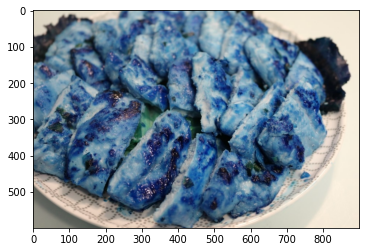

In [12]:
plt.imshow(img)
plt.show()

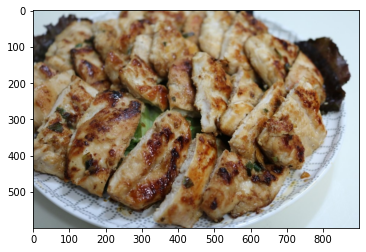

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
def show_image(dirs) :
    img = cv2_filereader(dirs)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

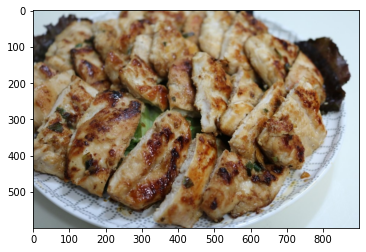

In [15]:
show_image(file_list.dir_name[0])

- 이미지를 읽어오는데, 몇개가 Nonetype으로 읽어진다. 아마 픽셀값이 누락되거나 완전한 이미지가 아닌 것들이 있는 것 같다.(~~윈도우 상에서는 정상으로 보입니다)
- 사용할 수 있는 데이터만 가져오기 위하여 valid_chk 함수를 만들어 사용할 수 있는 데이터만 사용하도록 하겠습니다.

In [16]:
cv2_filereader("data/kfood/구이/갈비구이/Img_000_0145.jpg").shape[0]

AttributeError: 'NoneType' object has no attribute 'shape'

각각의 이미지 크기를 확인해보도록 한다.

In [17]:
def file_valid_chk(x) :
    try :
        cv2_filereader(x).shape[0]
        return 1
    except :
        return 0

In [18]:
file_list["valid"] = [file_valid_chk(x) for x in tqdm(file_list.dir_name)]
file_list.valid.value_counts()

100%|█████████████████████████████████████████████████████████████████████████████| 5984/5984 [00:31<00:00, 188.59it/s]


1    5972
0      12
Name: valid, dtype: int64

- 데이터를 보면 dimension, 즉 모두가 컬러 이미지인 것은 확인할 수 있으나, shape(크기)가 모두 제각각이다.
- Model의 Input은 모두 동일하게 들어가야하므로 모두 통일시키는 작업이 추가되어야한다.

In [19]:
file_list = file_list[file_list.valid == 1]
file_list["shapes"] = [cv2_filereader(x).shape[:2] for x in tqdm(file_list.dir_name)]
file_list["dimensions"] = [cv2_filereader(x).shape[2] for x in tqdm(file_list.dir_name)]
file_list

100%|█████████████████████████████████████████████████████████████████████████████| 5972/5972 [00:27<00:00, 220.44it/s]


,dir_name,category,file_name,ext_name,valid,shapes,dimensions
0,data/kfood/구이/갈비구이/Img_000_0000.jpg,갈비구이,Img_000_0000.jpg,jpg,1,"(600, 900)",3
1,data/kfood/구이/갈비구이/Img_000_0001.jpg,갈비구이,Img_000_0001.jpg,jpg,1,"(480, 640)",3
2,data/kfood/구이/갈비구이/Img_000_0002.jpg,갈비구이,Img_000_0002.jpg,jpg,1,"(600, 900)",3
3,data/kfood/구이/갈비구이/Img_000_0003.jpg,갈비구이,Img_000_0003.jpg,jpg,1,"(336, 600)",3
4,data/kfood/구이/갈비구이/Img_000_0004.jpg,갈비구이,Img_000_0004.jpg,jpg,1,"(705, 470)",3
...,...,...,...,...,...,...,...
10970,data/kfood/구이/조개구이/Img_010_0995.jpg,조개구이,Img_010_0995.jpg,jpg,1,"(400, 394)",3
10971,data/kfood/구이/조개구이/Img_010_0996.jpg,조개구이,Img_010_0996.jpg,jpg,1,"(400, 711)",3
10972,data/kfood/구이/조개구이/Img_010_0997.jpg,조개구이,Img_010_0997.jpg,jpg,1,"(400, 525)",3
10973,data/kfood/구이/조개구이/Img_010_0998.jpg,조개구이,Img_010_0998.jpg,jpg,1,"(400, 601)",3


In [20]:
file_list.dimensions.value_counts()

3    5972
Name: dimensions, dtype: int64

In [21]:
file_list.shapes.nunique()

936

In [22]:
file_list.category.nunique()

6

---

### 2. **모델 구축**
- 이제 실제 모델을 돌릴 차례인데, 이번에는 모델을 짜지 않고 keras application에서 지원해주는 efficientNet이라는 것을 사용해볼 것이다.

In [23]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Input, Activation

- 이번 실습에서는 전이학습(pre-trained model의 weight를 가져오는 것)을 하지 않는다.
    - 추후 포스팅할 것이다.
- include_top = True로 놓아 마지막 fully connect 층까지 가져와 다져오는 것
    - 이번 포스팅에는 따로 모델을 커스텀하지 않고 커스텀하여 어떤 것을 할 수 있는지 추후 포스팅
- Input shape을 (124, 124, 3)으로 124 x 124 의 RGB 이미지로 만든다.
    - 위에서 언급했듯이, 모든 이미지의 shape을 통일시켜주는 작업이 추가되어야한다.

In [25]:
model = EfficientNetB0(include_top=True, weights=None, input_tensor = Input(shape = (124, 124, 3)), classes = 6)

- EfficientNet 모델의 아래와 같이 시각화할 수 있습니다.
    - 효율적이란 이름과 다르게 굉장히 깊은 모델을 만드는 것을 알 수 있다.
    - 각 레이어가 어떠한 역할을 하는지는 추후 포스팅

In [26]:
from tensorflow.keras.utils import plot_model

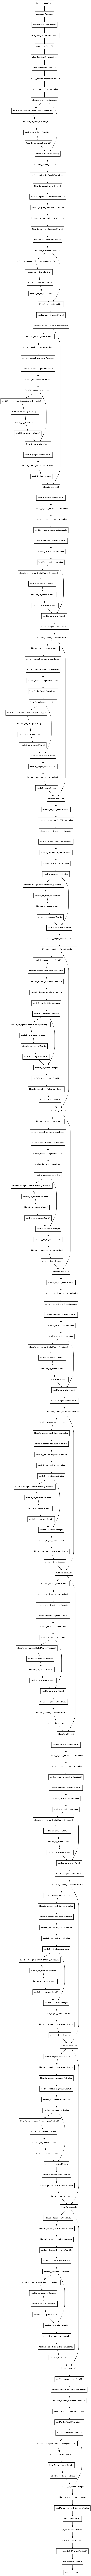

In [27]:
plot_model(model, to_file= "model_png/efficent_net_B0.png")

- 모델을 정리해서 보는 방법 중 summary를 통하여 보는 방법이다.
    - 위의 그림과 다르게 파라미터 개수들이 나온다.
    - 깊은 층으로 갈수록 계산량이 늘어나는 것을 확인할 수 있습니다.

In [28]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 124, 124, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 124, 124, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 124, 124, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 125, 125, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

- 다 만들어진 모델을 최종으로 Complie 합니다.
    - 이때 들어가는 파라미터인 Optimizer와 loss 에 대해서도 추후 포스팅할 것이다.

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy')

---

### 3. **Keras 모델에 학습시키기 위한 Train, Test Set 구축하기**

- 이번 실습에서는 Keras의 ImageDataGenerator를 활용하여 학습을 시키겠습니다.
    - 이미지는 RGB값이 각각 0\~254로 총 255의 값을 갖게 되는데, 이 때 225로 나누어 0\~1까지 Nomalization을 해줍니다.
        - 이는 Global Minima에 효과적으로 다가갈 수 있도록 도와줍니다..
> 참고자료 : [https://goodtogreate.tistory.com/entry/Neural-Network-%EC%A0%81%EC%9A%A9-%EC%A0%84%EC%97%90-Input-data%EB%A5%BC-Normalize-%ED%95%B4%EC%95%BC-%ED%95%98%EB%8A%94-%EC%9D%B4%EC%9C%A0](https://goodtogreate.tistory.com/entry/Neural-Network-%EC%A0%81%EC%9A%A9-%EC%A0%84%EC%97%90-Input-data%EB%A5%BC-Normalize-%ED%95%B4%EC%95%BC-%ED%95%98%EB%8A%94-%EC%9D%B4%EC%9C%A0)

In [71]:
DataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. / 255, validation_split = 0.2)

- Image Data Generator 중에 flow_from_dataframe이라는 함수를 활용하여 DataFrame에 있는 정보로 Keras 모델을 학습시키도록 하겠습니다.
    1. Input size를 통일시켜줍니다.
    2. Y값을 category화 시켜줍니다.
    3. 기타 파라미터들을 조절하여 학습을 쉽고 효과적으로 하도록 도와줍니다.
    4. 딥러닝도 역시 train과 test(혹은 validation)셋을 나누어 학습을 시켜야합니다.
        - validation set을 나누어 early stopping 같은 overfitting 방지와 학습 시간을 줄일 수 있다. (추후 포스팅)
    <br>
    <br>
    - 이번 포스팅에는 Augmentation은 하지 않고 추후에 포스팅하도록 하겠습니다.

In [72]:
train_generator = DataGenerator.flow_from_dataframe(file_list,                # 데이터프레임
                                        x_col = 'dir_name',     # 파일위치 열이름
                                        y_col = 'category',        # 클래스 열이름
                                        target_size = (124,124),    # 이미지 사이즈
                                        color_mode= 'rgb',          # 이미지 채널수
                                        class_mode= 'categorical',  # Y값 변화방법
                                        batch_size= 32,         # 배치사이즈
                                        Shuffle = True,         # 랜덤 여부
                                        seed = 42,              # 랜덤엔 시드
                                        interpolation= 'nearest',
                                        subset = "training"
                                        ) 

Found 4778 validated image filenames belonging to 6 classes.


In [73]:
val_generator = DataGenerator.flow_from_dataframe(file_list,                # 데이터프레임
                                        x_col = 'dir_name',     # 파일위치 열이름
                                        y_col = 'category',        # 클래스 열이름
                                        target_size = (124,124),    # 이미지 사이즈
                                        color_mode= 'rgb',          # 이미지 채널수
                                        class_mode= 'categorical',  # Y값 변화방법
                                        batch_size= 32,         # 배치사이즈
                                        Shuffle = True,         # 랜덤 여부
                                        seed = 42,              # 랜덤엔 시드
                                        interpolation= 'nearest',
                                        subset = "validation"
                                        ) 

Found 1194 validated image filenames belonging to 6 classes.


- generator에 있는 이미지가 124, 124의 크기로 바뀌고, Y값이 6으로 바뀌어있는 것을 확인할 수 있습니다.
    - 6으로 나와있지만 실제 categorical을 하면 One-Hot encoding을 해준다고 합니다.
    > 참고 : [https://keras.io/api/preprocessing/image/](https://keras.io/api/preprocessing/image/)

In [74]:
train_generator.next()[0][0].shape

(124, 124, 3)

In [75]:
train_generator.next()[1][0].shape

(6,)

- 위에서 1/255를 해주었기 때문에 다시 이미지를 복구하기 위하여 * 255를 한 값을 이미지화하여 확인합니다.

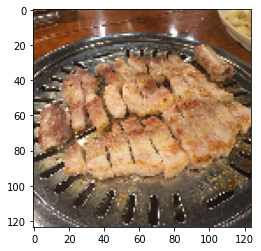

In [79]:
plt.imshow((train_generator.next()[0][0] * 255).astype(int))
plt.show()

14:45 시작

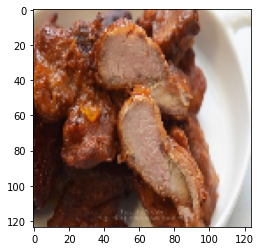

In [77]:
plt.imshow((val_generator.next()[0][0] * 255).astype(int))
plt.show()

---

### 4. **학습 및 검증**

In [ ]:
%time hist = model.fit_generator(generator, epochs=50, verbose=1)

Epoch 1/50
187/187 [==============================] - 249s 1s/step - loss: 0.7067
Epoch 2/50
187/187 [==============================] - 245s 1s/step - loss: 0.4669
Epoch 3/50
187/187 [==============================] - 259s 1s/step - loss: 0.3485
Epoch 4/50
187/187 [==============================] - 248s 1s/step - loss: 0.4072
Epoch 5/50
187/187 [==============================] - 232s 1s/step - loss: 0.3490
Epoch 6/50
187/187 [==============================] - 231s 1s/step - loss: 0.3830
Epoch 7/50
187/187 [==============================] - 249s 1s/step - loss: 0.2761
Epoch 8/50
187/187 [==============================] - 240s 1s/step - loss: 0.2416
Epoch 9/50
187/187 [==============================] - 256s 1s/step - loss: 0.2233
Epoch 10/50
 70/187 [==========>...................] - ETA: 2:32 - loss: 0.1821

- 아래 보면 loss가 줄어드는 것처럼 보이나, 실제로는 loss가 최저점이 아닌 곳에서 training이 끝난 것을 볼 수 있습니다.
    - 이 점을 예방할 수 있는 점도 추후 포스팅하겠습니다.

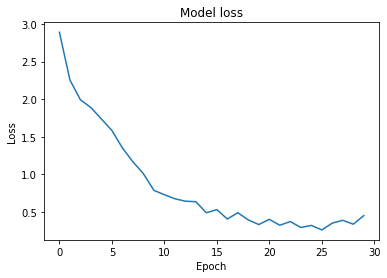

In [48]:
# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend('Train', 'Test'], loc='upper left')
plt.show()

---
**추후 포스팅(순서는 미정입니다.)**
- Augmentation
- Loss function
- Optimizer
- Layer(Batch Normalization 등)
- Transfer learning
- Early Stopping
- Model 평가

---
**포스팅을 마치며**
- 포스팅해야할 것들이 어마어마하게 많습니다....
- 학습속도가.... gpu가 있긴한데... tensorflow와 cuda 버전을 맞추기가 어렵습니다. 다음부턴 colab을 활용해야겠습니다.

---

참고 자료 :
- https://www.tensorflow.org/api_docs/python/tf/keras/
- https://youngq.tistory.com/40
- https://subinium.github.io/introduction-to-normalization/